Install vaderSentiment

In [1]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.2 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('./drive/My Drive/Colab Notebooks/nlp/UTS/BAGIAN KETIGA')

Import library pandas dan packet SentimentIntensityAnalyzer

In [5]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Melihat isi data Reviews_Filter.csv

In [6]:
df = pd.read_csv('Reviews_Filter.csv')

Melihat isi file teratas pada Reviews_FIlter.csv

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Melihat seluruh nama kolom pada file Reviews_Filter.csv

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      14999 non-null  int64 
 1   ProductId               14999 non-null  object
 2   UserId                  14999 non-null  object
 3   ProfileName             14999 non-null  object
 4   HelpfulnessNumerator    14999 non-null  int64 
 5   HelpfulnessDenominator  14999 non-null  int64 
 6   Score                   14999 non-null  int64 
 7   Time                    14999 non-null  int64 
 8   Summary                 14999 non-null  object
 9   Text                    14999 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.1+ MB


In [9]:
vader = SentimentIntensityAnalyzer()

Menghitung compound score pada fitur Text dan menyimpannya pada fitur baru yang bernama scores_VADER

In [10]:
df['scores_VADER'] = df['Text'].apply(lambda s: vader.polarity_scores(s)['compound'])

Melihat data teratas setelah diberikan fitur baru

In [11]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,scores_VADER
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8138
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468


Membuat fiitur baru dengan nama Num_words_text yang berisi jumlah kata-kata yang terdapat pada fitur Text

In [12]:
df['Num_words_text'] = df['Text'].apply(lambda x:len(str(x).split()))

Melihat data df teratas

In [14]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,scores_VADER,Num_words_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441,48
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8138,94
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.4404,41
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468,27


Import library baru dengan nama matplotlib.pyplot

In [16]:
import matplotlib.pyplot as plt

Membuat histogram compound score pada fitur scores_VADER dengan total bar 20

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc40d4ae50>]],
      dtype=object)

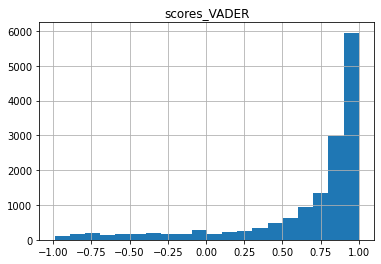

In [17]:
df.hist(column='scores_VADER', bins=20)